### Importación de librerias

In [437]:
import numpy as np
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from pycaret.classification import *

### Carga de datos

In [438]:
df = pd.read_csv('train_titanic.csv')

### Inspección inicial de los datos

In [439]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [440]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [441]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [442]:
df.shape

(891, 12)

El dataset incluye 10 posibles variables predictoras y la variable dependiente Survived, que indica si el pasajero sobrevivió o no al naufragio. Tiene 891 filas.  
Las variables predictoras son:
* **Pclass** : indica la clase en la que viaja el pasajero
* **Name**: Nombre del pasajero
* **Sex**: Género del pasajero
* **Age**: Edad del pasajero
* **SibSp**: Número de hermanos o cónyuges a bordo del Titanic
* **Parch**: Número de padres o hijos a bordo del Titanic
* **Ticket**: Número de Ticket
* **Fare**: Tarifa pagada por el pasajero
* **Cabin**: Cabina en la que se instala el pasajero
* **Embarked**: Puerto en el que ha embarcado (C = Cherbourg, Q = Queenstown, S = Southampton)

### Eliminación de columnas  
Eliminamos PassengerId, Name y Ticket por no tener valor predictivo. Eliminamos también Cabin, ya que más del 70% son Na.

In [443]:
df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

### Transformación de variable Sex  
Asignando 1 para hombre y 0 para mujer

In [444]:
df['Sex'].replace({'male':1, 'female':0}, inplace=True)

### Transformación de variable Embarked por One-Hot Encoding

In [445]:
df = pd.get_dummies(df, columns=['Embarked'], dtype=int)

### Analisis de correlación de variables numericas

In [446]:
df.corr()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
Survived,1.000000,-0.338481,-0.543351,-0.077221,-0.035322,0.081629,0.257307,0.168240,0.003650,-0.155660
Pclass,-0.338481,1.000000,0.131900,-0.369226,0.083081,0.018443,-0.549500,-0.243292,0.221009,0.081720
Sex,-0.543351,0.131900,1.000000,0.093254,-0.114631,-0.245489,-0.182333,-0.082853,-0.074115,0.125722
Age,-0.077221,-0.369226,0.093254,1.000000,-0.308247,-0.189119,0.096067,0.036261,-0.022405,-0.032523
SibSp,-0.035322,0.083081,-0.114631,-0.308247,1.000000,0.414838,0.159651,-0.059528,-0.026354,0.070941
Parch,0.081629,0.018443,-0.245489,-0.189119,0.414838,1.000000,0.216225,-0.011069,-0.081228,0.063036
Fare,0.257307,-0.549500,-0.182333,0.096067,0.159651,0.216225,1.000000,0.269335,-0.117216,-0.166603
Embarked_C,0.168240,-0.243292,-0.082853,0.036261,-0.059528,-0.011069,0.269335,1.000000,-0.148258,-0.778359
Embarked_Q,0.003650,0.221009,-0.074115,-0.022405,-0.026354,-0.081228,-0.117216,-0.148258,1.000000,-0.496624
Embarked_S,-0.155660,0.081720,0.125722,-0.032523,0.070941,0.063036,-0.166603,-0.778359,-0.496624,1.000000


### Tratamiento de Nas en Age  
Vemos si son MCAR viendo la correlación con otras variables.  
Si son MCAR imputo la mediana.

In [447]:
df['Age_isnull'] = df['Age'].isnull().astype(int)
df.corr()['Age_isnull'] #No parece haber relación de los Na de Age con otras variables, por lo que se presupone que son MCAR

Survived     -0.092197
Pclass        0.172933
Sex           0.055215
Age                NaN
SibSp         0.018958
Parch        -0.124104
Fare         -0.100707
Embarked_C    0.033270
Embarked_Q    0.337413
Embarked_S   -0.238377
Age_isnull    1.000000
Name: Age_isnull, dtype: float64

In [448]:
df['Age'].fillna(df['Age'].median(), inplace=True)

### Transformación de la variable Age  
La variable Age tiene una baja correlación, por lo que divido en 4 grupos para ver si aumenta la correlación con Survived.  
Tranformación en 4 grupos de edad:
* **Niños**: de 0 a 16
* **Jóvenes**: de 16 a 26
* **Adultos**: de 26 a 55
* **Mayores**: de 55 en adelante

In [449]:
df['Niño'] = (df['Age'] <= 16).astype(int)
df['Jóven'] = ((df['Age'] > 16) & (df['Age'] <= 26)).astype(int)
df['Adulto'] = ((df['Age'] > 26) & (df['Age'] <= 55)).astype(int)
df['Mayor'] = (df['Age'] > 55).astype(int)

In [450]:
df.drop(['Age', 'Age_isnull'], axis=1, inplace=True)

In [451]:
df.corr() #Se ve una correlación más alta si la persona es niño

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Niño,Jóven,Adulto,Mayor
Survived,1.000000,-0.338481,-0.543351,-0.035322,0.081629,0.257307,0.168240,0.003650,-0.155660,0.121485,-0.048566,-0.019771,-0.037375
Pclass,-0.338481,1.000000,0.131900,0.083081,0.018443,-0.549500,-0.243292,0.221009,0.081720,0.128232,0.110456,-0.093647,-0.203322
Sex,-0.543351,0.131900,1.000000,-0.114631,-0.245489,-0.182333,-0.082853,-0.074115,0.125722,-0.102403,-0.004483,0.045426,0.057823
SibSp,-0.035322,0.083081,-0.114631,1.000000,0.414838,0.159651,-0.059528,-0.026354,0.070941,0.337773,-0.084055,-0.112613,-0.073376
Parch,0.081629,0.018443,-0.245489,0.414838,1.000000,0.216225,-0.011069,-0.081228,0.063036,0.334728,-0.069791,-0.144881,-0.021958
Fare,0.257307,-0.549500,-0.182333,0.159651,0.216225,1.000000,0.269335,-0.117216,-0.166603,-0.004405,-0.033226,0.007166,0.058829
Embarked_C,0.168240,-0.243292,-0.082853,-0.059528,-0.011069,0.269335,1.000000,-0.148258,-0.778359,0.001316,-0.021945,-0.001812,0.047915
Embarked_Q,0.003650,0.221009,-0.074115,-0.026354,-0.081228,-0.117216,-0.148258,1.000000,-0.496624,-0.020778,-0.110638,0.114212,-0.008811
Embarked_S,-0.155660,0.081720,0.125722,0.070941,0.063036,-0.166603,-0.778359,-0.496624,1.000000,0.013676,0.091489,-0.069117,-0.047361
Niño,0.121485,0.128232,-0.102403,0.337773,0.334728,-0.004405,0.001316,-0.020778,0.013676,1.000000,-0.202978,-0.432833,-0.077086


### Visualización de posibles outliers en Fare

In [452]:
df.describe()['Fare']

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

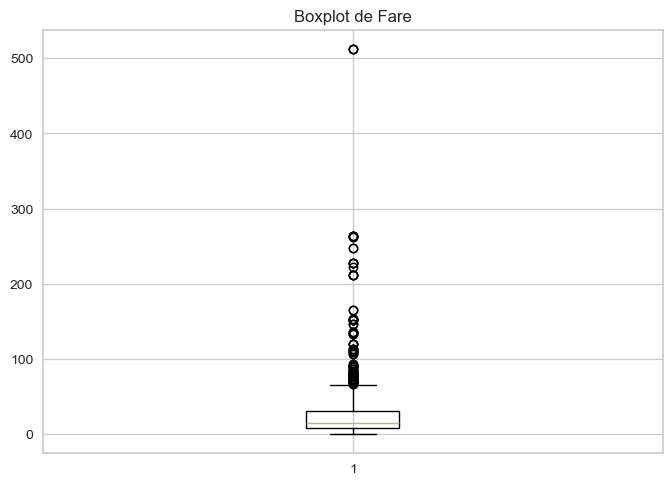

In [453]:
plt.boxplot(df['Fare'])
plt.title('Boxplot de Fare')
plt.show() #Parece que hay varios valores anomalos

In [454]:
z_scores = stats.zscore(df['Fare'])
outliers = df[(z_scores > 3) | (z_scores < -3)]
outliers.shape #Devuelve 20 valores detectados como anomalos, que vamos a sustituir por el percentil 95 y 5

(20, 13)

In [455]:
p5 = df['Fare'].quantile(0.05)
p95 = df['Fare'].quantile(0.95)

df.loc[z_scores > 3, 'Fare'] = p95
df.loc[z_scores < -3, 'Fare'] = p5

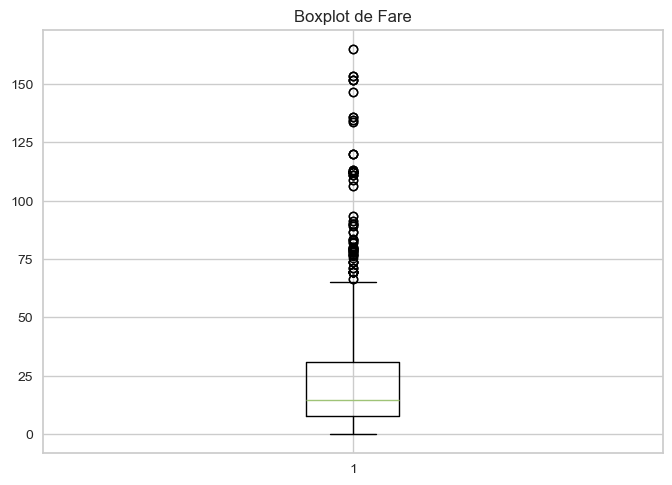

In [456]:
plt.boxplot(df['Fare'])
plt.title('Boxplot de Fare')
plt.show() #Parece que hay varios valores anomalos

### Normalización de variables  
Normalizo Fare con un escalado min-max

In [457]:
scaler = MinMaxScaler()
df['Fare'] = scaler.fit_transform(df[['Fare']])

In [458]:
df.corr()['Fare']

Survived      0.309044
Pclass       -0.676519
Sex          -0.241310
SibSp         0.235185
Parch         0.255547
Fare          1.000000
Embarked_C    0.268264
Embarked_Q   -0.147455
Embarked_S   -0.150027
Niño          0.024106
Jóven        -0.067141
Adulto        0.004508
Mayor         0.092180
Name: Fare, dtype: float64

### División en entrenamiento y test

In [459]:
X = df.drop(['Survived'], axis=1)
y = df['Survived']

In [460]:
train_data, test_data = train_test_split(df, test_size=0.3, random_state=42)

### Creación de modelo con pycaret

In [461]:
ordinal_features = {'Pclass': [1, 2, 3]}

In [462]:
setup(train_data, target='Survived', session_id=123, ordinal_features=ordinal_features, test_data=test_data)

,Description,Value
0,Session id,123
1,Target,Survived
2,Target type,Binary
3,Original data shape,"(891, 13)"
4,Transformed data shape,"(891, 13)"
5,Transformed train set shape,"(623, 13)"
6,Transformed test set shape,"(268, 13)"
7,Ordinal features,1
8,Numeric features,12
9,Preprocess,True


In [463]:
best_model = compare_models() #Elijo el modelo gbc, ya que lo que me interesa es la capacidad predictiva general, por lo que me fijo en accuracy

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.8250,0.8641,0.6966,0.8061,0.7446,0.6131,0.6191,0.0530
lightgbm,Light Gradient Boosting Machine,0.8220,0.8323,0.7272,0.7875,0.7510,0.6134,0.6190,0.0890
dt,Decision Tree Classifier,0.8026,0.7547,0.7101,0.7518,0.7263,0.5728,0.5767,0.0180
knn,K Neighbors Classifier,0.7978,0.8113,0.6620,0.7704,0.7065,0.5543,0.5625,0.0330
ada,Ada Boost Classifier,0.7977,0.8445,0.7014,0.7411,0.7185,0.5613,0.5636,0.0530
ridge,Ridge Classifier,0.7961,0.8324,0.6714,0.7511,0.7086,0.5527,0.5550,0.0160
rf,Random Forest Classifier,0.7947,0.8332,0.7101,0.7379,0.7201,0.5586,0.5619,0.0800
lda,Linear Discriminant Analysis,0.7945,0.8319,0.6714,0.7476,0.7070,0.5497,0.5518,0.0170
lr,Logistic Regression,0.7882,0.8324,0.6585,0.7418,0.6967,0.5352,0.5381,0.0180
et,Extra Trees Classifier,0.7882,0.7936,0.6928,0.7366,0.7087,0.5432,0.5483,0.0670


In [464]:
tuned_model = tune_model(best_model) #Los hiperparametros predefinidos funcionan mejor que los optimizados

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7937,0.7917,0.5833,0.8235,0.6829,0.5365,0.5540
1,0.7778,0.8005,0.6522,0.7143,0.6818,0.5116,0.5129
2,0.8889,0.9239,0.7826,0.9000,0.8372,0.7535,0.7577
3,0.9032,0.8941,0.7826,0.9474,0.8571,0.7850,0.7932
4,0.8065,0.8361,0.4783,1.0000,0.6471,0.5356,0.6048
5,0.7581,0.7414,0.5217,0.7500,0.6154,0.4471,0.4628
6,0.7742,0.8551,0.5217,0.8000,0.6316,0.4790,0.5017
7,0.7419,0.8896,0.5217,0.7059,0.6000,0.4158,0.4261
8,0.8065,0.8512,0.6522,0.7895,0.7143,0.5699,0.5759


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [465]:
evaluate_model(best_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

### Guardar el mejor modelo

In [466]:
save_model(best_model, 'gbc_titanic')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['Pclass', 'Sex', 'SibSp', 'Parch',
                                              'Fare', 'Embarked_C', 'Embarked_Q',
                                              'Embarked_S', 'Niño', 'Jóven',
                                              'Adulto', 'Mayor'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missing_values=nan,
                                                               strategy='mean')...
                                             criterion='friedman_mse',

### Descargar nuevo csv

In [467]:
df.to_csv('train_titanic_tratado', index=False)